# Retention Project Workbook (Full Data Science Pipeline)

**Target:** retained

**Goals:**
- Discover Drivers of retention through EDA and clustering.
- Use features to run classification models and make predictions

**Deliverables:**
- Work Notebook (Github)
- Report Notebook (Github)
- Wrangle.py (Github)
- README.md (Github)
- Project Summary for README, Report, Portfolio/Resume

**Initial thoughts and hypothesis:**
- Group features into categories
    - Target
        - retained
    - Student Demographics
        - id
        - race_ethn
        - sex
        - fgen
        - age_at_start_term
        - depend_status  
    - Financials
        - pell_ever
        - efc
        - fa_recd
    - Educational Stats
        - enrolled_1_back
        - time_status
        - sutdent_class
        - hs_gpa
        - term_gpa
        - original_type
        - cip_2dig
        - act
        - astd
        - dubya_count_term
        - span
        - days_between
- Educational Stats will probably have the most impact
- age, fgen, depend_status and financial aid will probably also be drivers
- retention is fall to fall and spring to spring

In [1]:
# Import for Data Manipulation
import pandas as pd
import numpy as np 

# Import for Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
import squarify

# Import for data acquisition and prep
import wrangle

# Import for Scaling and Spliting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Import for Classification models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import for analysis of classification models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import for Clustering
from sklearn.cluster import KMeans

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set to see all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

# Acquire

In [2]:
# students = pd.read_excel('college_retention_data.xlsx')

In [3]:
# def acquire_student_data():
#     '''
#     This function reads in a excel file and returns it as a dataframe.
#     '''
#     # Read excel into df
#     df = pd.read_excel('college_retention_data.xlsx')
#     # Return df
#     return df

In [4]:
# Read in Data dictionary
# data_dict = pd.read_excel('college_retention_data.xlsx',sheet_name=1)

In [5]:
# def acquire_data_dict():
#     '''
#     This funciton acquires the included data dictionary.
#     '''
#     # Read dictionary into dataframe
#     df = pd.read_excel('college_retention_data.xlsx',sheet_name=1)
#     # Return the dataframe
#     return df

# Prep

## Student Data Prep

In [6]:
# # Create function to manipulate cip df for ease of use
# def get_cip_codes():
#     # read in df
#     cip = pd.read_csv('cip_codes.csv')
#     # Narrow down df
#     cip = cip[['Title','CIP Code']]
#     # Fix columns
#     cip.columns = [col.lower().replace(' ','_') for col in cip]
#     # fix cip values
#     cip['cip_code'] = cip.cip_code.apply(lambda x: x[2:4])
#     # make int
#     cip['cip_code'] = cip.cip_code.astype('int')
#     # Rename cip column
#     cip = cip.rename(columns={'cip_code':'cip'})
#     # fix title vlaues
#     cip['title'] = cip.title.apply(lambda x: x.lower().replace(' ' , '_').replace( '.' , ''))
#     # return df
#     return cip

In [7]:
# # Test Function from wrangle.py
# students = wrangle.acquire_student_data()

In [8]:
# # Lowercase all column names
# students.columns = [col.lower() for col in students]

In [9]:
# # Change column names for ease of use
# students = students.rename(columns={'fakeid':'id','enrolled_1_back':'enrolled_between','student_classif':'student_year',\
#                                     'originaltype':'enroll_type','cip_2dig':'cip','astd':'academic_standing',\
#                                     'dubya_count_term':'w_count','span':'yrs_since_start','days_between':'reg_before_start'})

In [10]:
# # Drop Nulls for initial pass
# students = students.dropna()

In [11]:
# # Drop UN cip value
# students = students[students['cip'] != 'UN']
# # Retrieve cip codes with descriptions and return dataframe
# cip = get_cip_codes()

In [12]:
# students = pd.merge(students,cip, on='cip', how='left')

In [13]:
# students.w_count.value_counts()

In [14]:
# # One hot encode categorical columns
# # Replace (1,0): retained, enrolled_between, sex, time_status, pell_ever, academic_standing, fa_recd, w_count
# students['retained'] = students.retained.str.replace('Y', '1').str.replace('N', '0')
# students['enrolled_between'] = students.enrolled_between.str.replace('Y', '1').str.replace('N', '0')
# students['sex'] = students.sex.str.replace('F', '1').str.replace('M', '0')
# students['time_status'] = students.time_status.str.replace('FULL', '1').str.replace('PART', '0')
# students['pell_ever'] = students.pell_ever.str.replace('Y', '1').str.replace('N', '0')
# students['academic_standing'] = students.academic_standing.str.replace('GOODBIN', '1').str.replace('ISSUEBIN', '0')
# students['fa_recd'] = students.fa_recd.str.replace('Y', '1').str.replace('N', '0')
# students['w_count'] = students.w_count.str.replace('ONE_OR_MORE', '1').str.replace('NONE', '0')
# # Reassign as int type
# students[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']] = \
# students[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']].astype('int')
# # Create dummies: race_ethn, fgen, student_year, enroll_type, cip, age_at_start_term, act, depend_status, yrs_since_start
# dummy_name = pd.get_dummies(students[['race_ethn','fgen','student_year','enroll_type','title','age_at_start_term','act','depend_status','yrs_since_start']],dummy_na=False)
# # Combine df's
# students = pd.concat([students,dummy_name],axis=1)

In [15]:
# students.head()

In [16]:
# # Create prep function
# def prep_student_data(df):
#     '''
#     This function takes in the acquired dataframe and prepare the data for exploration.
#     '''
#     # Lowercase all column names
#     df.columns = [col.lower() for col in df]
#     # Change column names for ease of use
#     df = df.rename(columns={'fakeid':'id','enrolled_1_back':'enrolled_between','student_classif':'student_year',\
#                                     'originaltype':'enroll_type','cip_2dig':'cip','astd':'academic_standing',\
#                                     'dubya_count_term':'w_count','span':'yrs_since_start','days_between':'reg_before_start'})
#     # Drop Nulls for initial pass
#     df = df.dropna()
    
#     # Drop UN cip value
#     df = df[df['cip'] != 'UN']
#     # Retrieve cip codes with descriptions and return dataframe
#     cip = get_cip_codes()
#     # Merge the df's
#     students = pd.merge(students,cip, on='cip', how='left')
    
#     # One hot encode categorical columns
#     # Replace (1,0): retained, enrolled_between, sex, time_status, pell_ever, academic_standing, fa_recd, w_count
#     df['retained'] = df.retained.str.replace('Y', '1').str.replace('N', '0')
#     df['enrolled_between'] = df.enrolled_between.str.replace('Y', '1').str.replace('N', '0')
#     df['sex'] = df.sex.str.replace('F', '1').str.replace('M', '0')
#     df['time_status'] = df.time_status.str.replace('FULL', '1').str.replace('PART', '0')
#     df['pell_ever'] = df.pell_ever.str.replace('Y', '1').str.replace('N', '0')
#     df['academic_standing'] = df.academic_standing.str.replace('GOODBIN', '1').str.replace('ISSUEBIN', '0')
#     df['fa_recd'] = df.fa_recd.str.replace('Y', '1').str.replace('N', '0')
#     df['w_count'] = df.w_count.str.replace('ONE_OR_MORE', '1').str.replace('NONE', '0')
#     # Reassign as int type
#     df[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']] = \
#     df[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']].astype('int')
#     # Create dummies: race_ethn, fgen, student_year, enroll_type, cip, age_at_start_term, act, depend_status, yrs_since_start
#     dummy_name = pd.get_dummies(df[['race_ethn','fgen','student_year','enroll_type','title','age_at_start_term','act','depend_status','yrs_since_start']],dummy_na=False)
#     # Combine df's
#     df = pd.concat([df,dummy_name],axis=1)
    
#     # Return cleaned df
#     return df

## Addressing unique students ID

In [153]:
# students['id'].nunique()

In [155]:
# len(students)

In [156]:
# [students['id'].value_counts() == 1]

In [157]:
# students.head()

In [152]:
# student_zero[['enrolled_between','time_status','student_year','efc','term_gpa','cip','age_at_start_term','depend_status','w_count','yrs_since_start','reg_before_start']]\
# .sort_values(by=['student_year','yrs_since_start','age_at_start_term',])

In [151]:
# student_zero = train[train['id'] == 459725]
# student_zero

In [158]:
# freshman = students[students['student_year'] =='FR']

In [159]:
# freshman['id'].nunique()

In [160]:
# freshman_zero

In [115]:
# freshman['id'].value_counts()

In [161]:
# freshman_zero = freshman[freshman['id'] == 508071]

In [162]:
# freshman_zero[['retained','enrolled_between','time_status','student_year','efc','term_gpa','cip','age_at_start_term','depend_status','w_count','yrs_since_start','reg_before_start']]\
# .sort_values(by=['student_year','yrs_since_start','age_at_start_term',])

### Summary of ID assessment
- Each individual row is considered an individual observation of retention year over a year based on variables provided. Individual students show up in dataset multiple times. So this is not a measure of whether an individual student is retained over time but a measure of individual instances of year over year retention. With more data provided and further exploration and analysis, more could be done to understand drivers of individual student retention.

## Impute (for later)

In [17]:
# efc


In [18]:
# hs_gpa

## Split

In [19]:
# Test Functions
students = wrangle.prep_student_data(wrangle.acquire_student_data())
students.shape

(140800, 87)

In [20]:
# Split Data for further exploration
target = 'retained'
train, validate, test = wrangle.split_data(students, target)
train.shape

(78848, 87)

In [21]:
# Split for modeling
target = 'retained'
X_train, y_train = wrangle.model_split(train,target)
X_validate, y_validate = wrangle.model_split(validate,target)
X_test, y_test = wrangle.model_split(test,target)
X_train.shape

(78848, 86)

### Scaling

In [22]:
# Scale data
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train,validate,test)
train_scaled.shape

(78848, 13)

# Initial EDA

## Univariate (students df used)

In [23]:
# students.shape

- (448176, 22)

In [24]:
# students.describe(include='all')

- efc, hs_gpa, and term_gpa have missing data. efc has a suspicious max. 
- 1 key variable (id), 17 categorical, 4 continuous (efc,hs_gpa,term_gpa,reg_before_start)

In [25]:
# students.info()

In [26]:
# students.isnull().sum()

Missing
- efc: 128245
- hs_gpa: 247365
- term_gpa: 89

In [27]:
# students.isnull().mean()

Percent Missing
- efc: 0.286149 (Impute efc)
- hs_gpa: 0.551937 (Potentially drop hs_gpa)
- term_gpa: 0.000199 (Do not worry about term_gpa)

In [28]:
# students.hist(figsize=(40,20), bins =20)
# plt.show()

- Explore term_gpa: spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below.
- Explore reg_before_start: spike between 75 and 100, below 75 higher than above 100, 
        - external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature)
- hs_gpa shows a normal distribution around just below 3.0. Could be good for impute.
- efc looks suspect still

In [29]:
# variables = students.columns[students.dtypes == 'object']

# for col in variables:
#     print(f'{col}\n\n\n{students[col].value_counts(dropna=False)}\n\n')

- One hot encode categorical columns
- Replace (1,0): retained, enrolled_between, sex, time_status, pell_ever, academic_standing, fa_recd, w_count
- Create dummies: race_ethn, fgen, student_year, enroll_type, cip, age_at_start_term, act, depend_status, yrs_before_start

In [30]:
# students.cip.value_counts(normalize = True)

In [31]:
train.id.nunique()

32188

In [32]:
students.id.nunique()

38301

- 52: almost 19% 
- 24: 12% 
- 50, 42, 26: 6%
- 43, 13, 23, 15, 30, 51, 44, 31, 45, 11, 49, 54, 9, 40, 3, 27 between 5% and 1%
- 16, 38, 5, 14, 10, 1, 32, 29 below 1$

### Univariate Summary:

- efc: 1/3 missing, suspicious max (impute?)
- hs_gpa: 55% missing, potentially drop, normal distribution possibly (impute or drop?)
- term_gpa only missing a few, spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below. (possible clusters?)
- reg_before_start spike between 75 and 100, below 75 higher than above 100, external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature, cluster or both)
- Change cip into major types and one hot encode
- Rank values by their Retention percentage (feature?)

##  Bivariate (Train df used)

In [33]:
# train.info()

In [34]:
# columns = train.columns[train.dtypes == 'object']
# for col in columns:
#     plt.figure(figsize=(15,8))
#     print(f'{col}\n\n--------------------------------------------------------------')
#     print(f'{train.groupby("retained")[col].value_counts().sort_values(ascending=False)}')
#     sns.countplot(train[col], hue=train['retained'])
#     plt.show()
#     print(f'{train.groupby(col)["retained"].value_counts(normalize=True).sort_values(ascending=False)}')
#     print(f'=======================================================\n\n')

In [35]:
# columns = train.columns[(train.dtypes == 'int') | (train.dtypes == 'float') | (train.dtypes == 'uint8')]
# # print(f'Not Retained:\n\n')
# # print(f'{train[train["retained"]=="N"].describe()}\n')
# # print(f'Retained:\n\n')
# # print(f'{train[train["retained"]=="Y"].describe()}\n')
# for col in columns:
#     print(f'{col}\n\n--------------------------------------------------------------')
#     sns.barplot(x='retained', y=col, data= train)
#     plt.show()
#     print(f'=======================================================\n\n')

In [36]:
# sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}},corner=True)

In [69]:
# # Perform a Pearson Correlation on the dataset
# plt.figure(figsize=(4,20))
# correlate = train.corr()
# # Plot the Correlation on a heatmap
# sns.heatmap(correlate.loc[['retained']].T, annot=True, cmap='coolwarm')
# plt.show()

- slight correlation between enrolled_between, term_gpa, academic standing. with a slight negative correlation to freshman status

In [38]:
# plt.figure(figsize=(15,8))
# sns.relplot(x='term_gpa',y='reg_before_start',data=train,col='retained',row='title',height=10)
# plt.show()

### Bivariate Summary: 

- race_ethn: mostly white/hispanic population
- fgen: mostly first generation with little difference in retention
- year: negative correlation between class year and population size. Juniors had the lowest retention rate. 
- enroll_type: most students were first time college students out of high school. Did not show much difference in retention between different types.
- cip: 52, 24 had highest population, 42,43,50,26 followed with next biggest group. (POSSIBLE CLUSTERS) Out of big groups 24 showed the lowest retention rate.
- age: 19-22 by far the largest population. 18 and under had lowest retention(did they transfer?)
- yr_since_start: 0 had lowest retention, 1 and 6 or more had next lowest, 5, 2, 4, 3 (EXPLORE IN MULTI)

Following showed low retention stutus
- w_count
- communication major
- computer information systems
- engineering
- liberal arts
- philosophy and religious studies
- 18 or younger
- 23 to 29
- act_NADA
- depend_status_IND
-yrs_since_start_0
-yrs_since_start_1



## Questions to answer

## Question 1: How did area of study affect retention?

In [322]:
# Count of instances of study catagory
count = list(train.title.value_counts().sort_index().values)
# Percent of each area of study to the whole
percent = list(train.title.value_counts(normalize=True).sort_index().values)
# Percent of retained in each area of study
percent_retained = list(train[['retained','title']].groupby('title').mean().round(4).retained.values)
# Percent not retained in each area of study
percent_not_retained = [round(num , 4) for num in list(1 - train[['retained','title']].groupby('title').mean().sort_values(by='retained').retained.values)]
# Mean retention rate of all instances
overall_mean_retention = train.retained.mean()
# Variable names for df assignment
columns = list(train.title.sort_values().unique())
# Create Df
study_df = pd.DataFrame([count, percent, percent_retained, percent_not_retained] , index = ['count','percent','percent_retained','percent_not_retained'] ,columns = columns).T.reset_index()
# Show areas of study with less retention than the average and sort by not retained
df = study_df[study_df['percent_retained'] < overall_mean_retention].sort_values(by='percent_not_retained',ascending=False)
df

,index,count,percent,percent_retained,percent_not_retained
0,"area,_ethnic,_cultural,_gender,_and_group_studies",224.0,0.002841,0.6830,0.4324
4,communications_technologies/technicians_and_support_services,37.0,0.000469,0.5676,0.3173
5,computer_and_information_sciences_and_support_services,1951.0,0.024744,0.6827,0.3170
7,engineering,255.0,0.003234,0.6784,0.3023
8,engineering/engineering-related_technologies/technicians,2987.0,0.037883,0.6977,0.2983
14,"liberal_arts_and_sciences,_general_studies_and_humanities",12343.0,0.156542,0.5991,0.2777
19,philosophy_and_religious_studies,174.0,0.002207,0.6322,0.2587
25,visual_and_performing_arts,5375.0,0.068169,0.6975,0.2304


<AxesSubplot:xlabel='percent', ylabel='percent_not_retained'>

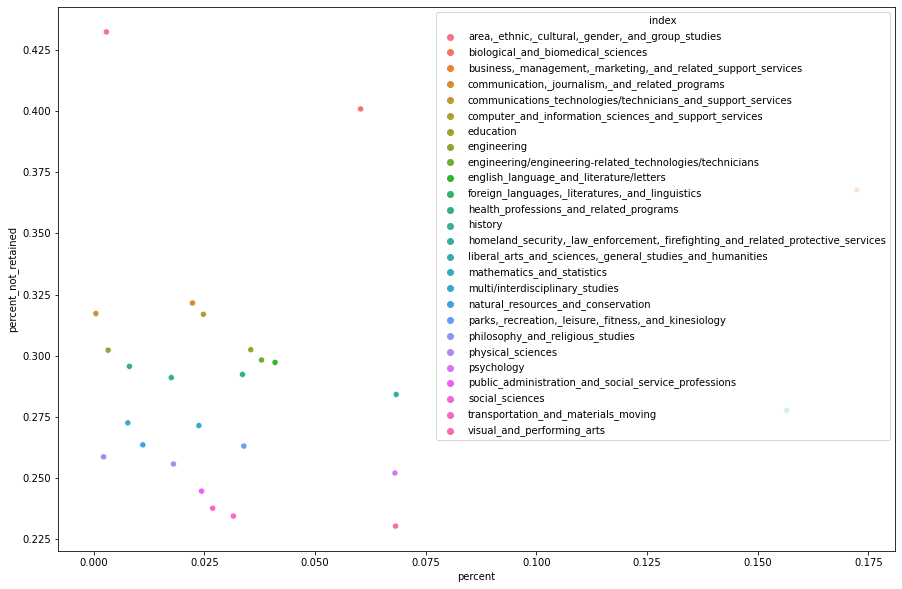

In [323]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='percent',y='percent_not_retained', data=study_df, hue='index')

In [41]:
# Hypothesis Test

### Question 1 Summary:

## Question 2: Does a students age combined with area of study affect retention?

In [42]:
# Data

In [43]:
# Viz

In [44]:
# Hypothesis Test

### Question 2 Summary:

## Question 3: How did the number of years since the student start affect retention?

In [45]:
# Data

In [46]:
# Viz

In [47]:
# Hypothesis Test

### Question 3 Summary:

## Question 4: Does the students class status (Freshman, Sophmore,etc..) vs the years since a student started affect retention?

In [48]:
# Data

In [49]:
# Viz

In [50]:
# Hypothesis Test

### Question 4 Summary:

## Question 5: Does a students full time or part time status affect retention?

In [51]:
# Data

In [52]:
# Viz

In [53]:
# Hypothesis Test

### Question 5 Summary:

## Question 6: Does the students full time / part time status combined with the students dependent status affect retention?

In [54]:
# Data

In [55]:
# Viz

In [56]:
# Hypothesis Test

### Question 6 Summary:

## Question 7: Does the students w_count affect retention?

In [57]:
# Data

In [58]:
# Viz

In [59]:
# Hypothesis Test

### Question 7 Summary:

## Question 8: Does the students financial aid status and pell_grant status affect retention?

In [60]:
# Data

In [61]:
# Viz

In [62]:
# Hypothesis Test

### Question 8 Summary:

## Question 9: How does a students expected family contribution affect retention?

In [63]:
# Data

In [64]:
# Viz

In [65]:
# Hypothesis Test

### Question 9 Summary:

## Question 10: Does a students term gpa or hs gpa affect retention?

In [66]:
# Data

In [67]:
# Viz

In [68]:
# Hypothesis Test

### Question 10 Summary:

## Questions Summary:

- Q1:
- Q2:
- Q3:
- Q4:
- Q5:
- Q6:
- Q7:
- Q8:
- Q9:
- Q10:



# TODO

## Bivariate and multivariate explore (Reaction with target?)

- Create and answer questions

- Explore possible feature engineering

## Feature Engineering/Clustering

- term_gpa only missing a few, spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below. (possible clusters?)

- reg_before_start spike between 75 and 100, below 75 higher than above 100, external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature, cluster or both)

## Model

- initial models

- ensemable

## Finish MVP

# Questions beyond the data
- Does data account for major changes? 
- Which students were fall to fall and spring to spring?

## Later TODO

- Address nulls

    - efc: 1/3 missing, suspicious max (impute?)

    - hs_gpa: 55% missing, potentially drop, normal distribution possibly (impute or drop?)

- Comparing subgroups to overall retention by scaling smaller groups up and see how it affects over all retention

- Rank values by their Retention percentage (feature?)

- Spherical Kmeans

## Initial EDA Summary:

# Feature Exploration

## Clustering

### K-modes

#### K-Modes Summary:

### K-prototypes

#### K-prototypes Summary: 

### DBSCAN

#### DBSCAN Summary:

### Hierarchical Clustering

#### Hierarchical Clustering Summary:

### Clustering Summary:

## Dimensionality Reduction

### Dimensionality Reduction and Feature Exploration Summary:

# Modeling

## Baseline:

### Baseline Summary:

## Evaluation Metrics

## Train and Validate Initial Models:

### Decision Tree

#### Decision Tree Summary: 

### Random Forest

#### Random Forst Summary:

### KNN

#### KNN Summary:

### Logistic Regression

#### Logistic Regression Summary:

### SVM

#### SVM Summary:

### Ensemble

#### Ensemble Summary:

### Train and Validate Initial Models Summary:

## Test Final Models

### Test Final Model Summary:

## Modeling Summary:

# Conclusion: